In [1]:
#enabling gpu in colab
import tensorflow as tf
tf.test.gpu_device_name()
# not necesserily needed

''

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:
!cd gdrive/MyDrive/cs464_hw2_dataset/
!unzip gdrive/MyDrive/cs464_hw2_dataset/afhq_dog.zip # this file is needed in that location to run this code properly

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: flickr_dog_000241.jpg   
  inflating: flickr_dog_000242.jpg   
  inflating: flickr_dog_000243.jpg   
  inflating: flickr_dog_000244.jpg   
  inflating: flickr_dog_000245.jpg   
  inflating: flickr_dog_000246.jpg   
  inflating: flickr_dog_000247.jpg   
  inflating: flickr_dog_000248.jpg   
  inflating: flickr_dog_000249.jpg   
  inflating: flickr_dog_000250.jpg   
  inflating: flickr_dog_000251.jpg   
  inflating: flickr_dog_000252.jpg   
  inflating: flickr_dog_000253.jpg   
  inflating: flickr_dog_000254.jpg   
  inflating: flickr_dog_000255.jpg   
  inflating: flickr_dog_000256.jpg   
  inflating: flickr_dog_000257.jpg   
  inflating: flickr_dog_000258.jpg   
  inflating: flickr_dog_000259.jpg   
  inflating: flickr_dog_000260.jpg   
  inflating: flickr_dog_000261.jpg   
  inflating: flickr_dog_000262.jpg   
  inflating: flickr_dog_000263.jpg   
  inflating: flickr_dog_000264.jpg   
  inflating: flickr_dog_000265.jpg   
  i

In [4]:
!cd ..
!ls
!mkdir dataset
!mv *.jpg dataset

dataset			pixabay_dog_000565.jpg	pixabay_dog_002313.jpg
first_image		pixabay_dog_000566.jpg	pixabay_dog_002314.jpg
flickr_dog_000002.jpg	pixabay_dog_000567.jpg	pixabay_dog_002315.jpg
flickr_dog_000003.jpg	pixabay_dog_000568.jpg	pixabay_dog_002316.jpg
flickr_dog_000004.jpg	pixabay_dog_000569.jpg	pixabay_dog_002317.jpg
flickr_dog_000005.jpg	pixabay_dog_000570.jpg	pixabay_dog_002318.jpg
flickr_dog_000006.jpg	pixabay_dog_000571.jpg	pixabay_dog_002319.jpg
flickr_dog_000007.jpg	pixabay_dog_000572.jpg	pixabay_dog_002320.jpg
flickr_dog_000008.jpg	pixabay_dog_000573.jpg	pixabay_dog_002321.jpg
flickr_dog_000009.jpg	pixabay_dog_000574.jpg	pixabay_dog_002322.jpg
flickr_dog_000010.jpg	pixabay_dog_000575.jpg	pixabay_dog_002323.jpg
flickr_dog_000011.jpg	pixabay_dog_000576.jpg	pixabay_dog_002324.jpg
flickr_dog_000012.jpg	pixabay_dog_000577.jpg	pixabay_dog_002325.jpg
flickr_dog_000013.jpg	pixabay_dog_000578.jpg	pixabay_dog_002326.jpg
flickr_dog_000014.jpg	pixabay_dog_000579.jpg	pixabay_dog_002327.jpg
f

In [5]:
# Saving the first image to different folder
# In the following part the images are going to shuffle 
# Therefore, for the question 1.3 I'm saving first image to another folder 
!mkdir first_image
import PIL
from PIL import Image
dir = "./dataset/flickr_dog_000002.jpg"
first_image =PIL.Image.open(dir).resize((64,64), Image.BILINEAR)
first_image.save("./first_image/first.jpg")

mkdir: cannot create directory ‘first_image’: File exists


In [6]:
!mkdir updated_dataset # making a directory to keep the resized images

mkdir: cannot create directory ‘updated_dataset’: File exists


In [7]:
import os
FOLDER_PATH = 'dataset'
ROOT_PATH = '.'
print(len(os.listdir(os.path.join(ROOT_PATH, FOLDER_PATH)))) #printing number of files in the folder

5239


In [8]:
file_list = [entry for entry in os.listdir(FOLDER_PATH)]
print(len(file_list)) #length of file_list
#file_list.index("pixabay_dog_000002.jpg") #first image location

5239


In [9]:
for i in range(0,5239):
  dir = FOLDER_PATH+"/"+file_list[i]
  img = PIL.Image.open(dir).resize((64,64), Image.BILINEAR)
  pth = f"./updated_dataset/updated_image_{i}.jpg"
  img.save(pth)
  #img = PIL.Image.open(dir).resize((64,64), Image.BILINEAR)

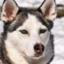

In [10]:
updated_file_list = [i for i in os.listdir("./updated_dataset")]
p = "./updated_dataset"+"/"+updated_file_list[0]
im = PIL.Image.open(p)
im.size # (64,64) size as requested
im

In [11]:
import numpy as np
x = np.array(im)
x = x.astype('float32')
X_0 = x[:,:,0].flatten()
X_1 = x[:,:,1].flatten()
X_2 = x[:,:,2].flatten()
y = np.array([X_0,X_1,X_2])
X = y.T
X.shape # this procedure will be done for all 5239 images

(4096, 3)

In [12]:
# Creating required arrays
original = np.ones((5239,4096,3))
X_red = np.ones((5239,4096))
X_green = np.ones((5239,4096))
X_blue = np.ones((5239,4096))
X_red.shape, X_green.shape, X_blue.shape, original.shape

((5239, 4096), (5239, 4096), (5239, 4096), (5239, 4096, 3))

In [13]:
for i in range(0,5239):
  p = "./updated_dataset"+"/"+updated_file_list[i]
  im = PIL.Image.open(p) 
  x = np.array(im)
  x = x.astype('float32')
  X_0 = x[:,:,0].flatten()
  X_1 = x[:,:,1].flatten()
  X_2 = x[:,:,2].flatten()
  y = np.array([X_0,X_1,X_2])
  X = y.T
  X_red[i,:] = X[:,0]
  X_green[i,:] = X[:,1]
  X_blue[i,:] = X[:,2]

In [14]:
original = np.array([X_red,X_green,X_blue])
original.shape

(3, 5239, 4096)

In [15]:
original = original.transpose((1,2,0)) #rearranging shape to be (5239,4096,3)
original.shape

(5239, 4096, 3)

In [16]:
def PCA(X, d):
    # Compute the mean of data
    mean = np.mean(X)
    # Center the data by substrackting mean
    X_tilde = X - mean
    # Find covariance matrix
    C = np.matmul(X_tilde.T,X_tilde)/X_tilde.shape[0]
    # Find eigenvectors and eigenvalues.
    eigvals, eigvecs = np.linalg.eigh(C)
    # Choose the top d eigenvalues and corresponding eigenvectors.
    eigvals = eigvals[::-1]
    eigvecs = eigvecs[:, ::-1]
    W = eigvecs[:, 0:d]
    eg = eigvals[0:d]
    return W, eg, eigvals
# Explained variance can be computed in the following line, which is going to be used in the other parts
#pve = 100*eg.sum()/eigvals.sum()
# Compute the explained variance for one principal component
#pve_for_d = 100*eg[d-1]/ eigvals.sum()

In [17]:
#PCA for X_red with 4096 principal components
W_R, eg_R, eigvals_R = PCA(X_red,4096)
#PCA for X_green with 4096 principal components 
W_G, eg_G, eigvals_G = PCA(X_green,4096)
#PCA for X_blue with 4096 principal components
W_B, eg_B, eigvals_B = PCA(X_blue,4096)

##Q1.1

In [18]:
# 10 Principal components of red channel
pca10_R = W_R[:,:10]
# 10 Principal components of green channel
pca10_G = W_G[:,:10]
# 10 Principal components of blue channel
pca10_B = W_B[:,:10]

In [19]:
# Computing the PVE for principal components and their sum for X_red
for i in range(1,11):
  pve = 100*eg_R[i-1:i].sum()/eigvals_R.sum()
  pve_total = 100*eg_R[:i].sum()/eigvals_R.sum()
  print(f"pve for red in {i}_th principal is {pve}%")
  print(f"pve for red for sum of all principals to principal number {i} is {pve_total}%")

pve for red in 1_th principal is 21.12975362816217%
pve for red for sum of all principals to principal number 1 is 21.12975362816217%
pve for red in 2_th principal is 13.323149944838796%
pve for red for sum of all principals to principal number 2 is 34.45290357300097%
pve for red in 3_th principal is 7.368321023651576%
pve for red for sum of all principals to principal number 3 is 41.82122459665255%
pve for red in 4_th principal is 5.274048822738923%
pve for red for sum of all principals to principal number 4 is 47.09527341939147%
pve for red in 5_th principal is 4.179185360846149%
pve for red for sum of all principals to principal number 5 is 51.27445878023762%
pve for red in 6_th principal is 3.6403506125073717%
pve for red for sum of all principals to principal number 6 is 54.91480939274499%
pve for red in 7_th principal is 2.305698268707992%
pve for red for sum of all principals to principal number 7 is 57.22050766145298%
pve for red in 8_th principal is 2.1348478437310416%
pve for

In [20]:
# Computing the PVE for principal components and their sum for X_green
for i in range(1,11):
  pve = 100*eg_G[i-1:i].sum()/eigvals_G.sum()
  pve_total = 100*eg_G[:i].sum()/eigvals_G.sum()
  print(f"pve for green in {i}_th principal is {pve}%")
  print(f"pve for green for sum of all principals to principal number {i} is {pve_total}%")

pve for green in 1_th principal is 19.437714832600072%
pve for green for sum of all principals to principal number 1 is 19.437714832600072%
pve for green in 2_th principal is 14.09207072408398%
pve for green for sum of all principals to principal number 2 is 33.529785556684054%
pve for green in 3_th principal is 7.446136810465317%
pve for green for sum of all principals to principal number 3 is 40.975922367149366%
pve for green in 4_th principal is 5.275971421491094%
pve for green for sum of all principals to principal number 4 is 46.251893788640466%
pve for green in 5_th principal is 4.179143296720124%
pve for green for sum of all principals to principal number 5 is 50.431037085360586%
pve for green in 6_th principal is 4.05900223084417%
pve for green for sum of all principals to principal number 6 is 54.49003931620476%
pve for green in 7_th principal is 2.4311590841434567%
pve for green for sum of all principals to principal number 7 is 56.92119840034822%
pve for green in 8_th princi

In [21]:
# Computing the PVE for principal components and their sum for X_blue
for i in range(1,11):
  pve = 100*eg_B[i-1:i].sum()/eigvals_B.sum()
  pve_total = 100*eg_B[:i].sum()/eigvals_B.sum()
  print(f"pve for blue in {i}_th principal is {pve}%")
  print(f"pve for blue for sum of all principals to principal number {i} is {pve_total}%")

pve for blue in 1_th principal is 22.447499512436135%
pve for blue for sum of all principals to principal number 1 is 22.447499512436135%
pve for blue in 2_th principal is 13.456354530068918%
pve for blue for sum of all principals to principal number 2 is 35.903854042505046%
pve for blue in 3_th principal is 6.875993551104815%
pve for blue for sum of all principals to principal number 3 is 42.779847593609865%
pve for blue in 4_th principal is 5.281352364091722%
pve for blue for sum of all principals to principal number 4 is 48.06119995770159%
pve for blue in 5_th principal is 4.301273791158289%
pve for blue for sum of all principals to principal number 5 is 52.36247374885988%
pve for blue in 6_th principal is 3.534604450734204%
pve for blue for sum of all principals to principal number 6 is 55.897078199594084%
pve for blue in 7_th principal is 2.276645976441961%
pve for blue for sum of all principals to principal number 7 is 58.173724176036046%
pve for blue in 8_th principal is 2.02732

In [22]:
# Computing the mininmum principal component number that is required to obtain at least 70% pve
# This cell computes for X_red 
pve_R_to_70=0
for i in range(10,20):
  pve_R_to_70 = 100*eg_R[:i].sum()/eigvals_R.sum()
  print(f"pve for red in {i}_th principal is {pve_R_to_70}%")
  if pve_R_to_70 > 70:
    break
print(f"pve for red in {i}_th principal is {pve_R_to_70}% which is greater than 70%")

pve for red in 10_th principal is 62.72863678989597%
pve for red in 11_th principal is 64.23350445506513%
pve for red in 12_th principal is 65.60853855064252%
pve for red in 13_th principal is 66.77261611312777%
pve for red in 14_th principal is 67.78347783392108%
pve for red in 15_th principal is 68.74743648485047%
pve for red in 16_th principal is 69.61396012263366%
pve for red in 17_th principal is 70.46913583208429%
pve for red in 17_th principal is 70.46913583208429% which is greater than 70%


In [23]:
# Computing the mininmum principal component number that is required to obtain at least 70% pve
# This cell computes for X_green
pve_G_to_70=0
for i in range(10,20):
  pve_G_to_70 = 100*eg_G[:i].sum()/eigvals_G.sum()
  print(f"pve for green in {i}_th principal is {pve_G_to_70}%")
  if pve_G_to_70 > 70:
    break
print(f"pve for green in {i}_th principal is {pve_G_to_70}% which is greater than 70%")

pve for green in 10_th principal is 62.32501198307136%
pve for green in 11_th principal is 63.82996793229497%
pve for green in 12_th principal is 65.19545820465889%
pve for green in 13_th principal is 66.32734352208628%
pve for green in 14_th principal is 67.33331520782293%
pve for green in 15_th principal is 68.29816401501992%
pve for green in 16_th principal is 69.18941778027845%
pve for green in 17_th principal is 70.05110880108388%
pve for green in 17_th principal is 70.05110880108388% which is greater than 70%


In [24]:
# Computing the mininmum principal component number that is required to obtain at least 70% pve
# This cell computes for X_blue 
pve_B_to_70=0
for i in range(10,20):
  pve_B_to_70 = 100*eg_B[:i].sum()/eigvals_B.sum()
  print(f"pve for blue in {i}_th principal is {pve_B_to_70}%")
  if pve_B_to_70 > 70:
    break
print(f"pve for blue in {i}_th principal is {pve_B_to_70}% which is greater than 70%")

pve for blue in 10_th principal is 63.43482492248334%
pve for blue in 11_th principal is 64.82772599679336%
pve for blue in 12_th principal is 66.1738818056056%
pve for blue in 13_th principal is 67.27712213588735%
pve for blue in 14_th principal is 68.27606582776646%
pve for blue in 15_th principal is 69.19112036327556%
pve for blue in 16_th principal is 70.0579180108481%
pve for blue in 16_th principal is 70.0579180108481% which is greater than 70%


##Q1.2

In [25]:
def scale(W,i):  # this function normalizes and reshapes the values
  resized_W = W.reshape(64,64,-1)[...,i]
  max = np.max(resized_W)
  min = np.min(resized_W)
  scaled_W = (resized_W - min)/(max-min)
  return scaled_W
def stack(R,G,B): # this functions stacks 3 channels and transposes in order to get expected order of channels (n,n,c)
  return np.array([R,G,B]).transpose(1,2,0)
R = scale(pca10_R,0)
G = scale(pca10_G,0)
B = scale(pca10_B,0)
stacked = stack(R,G,B) # example of how this function works

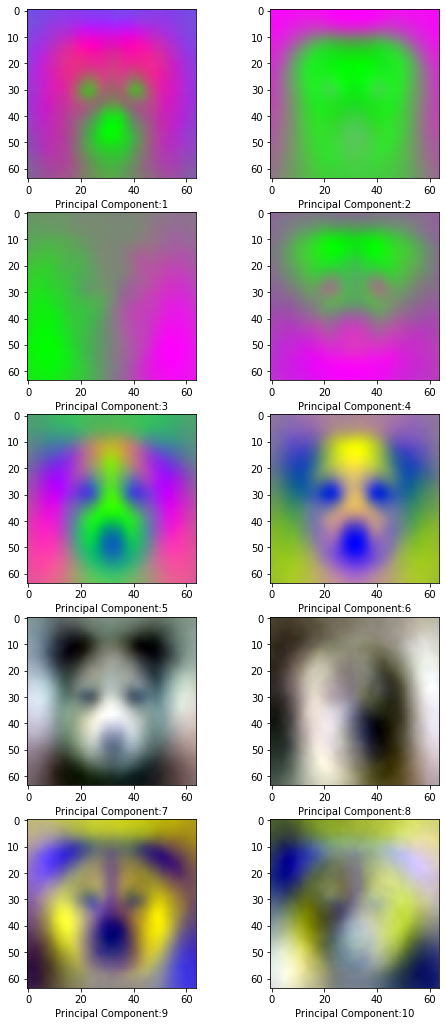

In [26]:
# Displaying 10 RGB images in which have eigenvectors for 10 principals
import matplotlib.pyplot as plt
plt.figure(figsize=(8,18))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.imshow(stack(scale(pca10_R,i),scale(pca10_G,i),scale(pca10_B,i)))
    plt.xlabel(f'Principal Component:{i+1}')

##Q1.3

In [27]:
first_image = np.array(first_image) # Taking the first image and preprocessing in order to use for our case
first_image = first_image.astype('float32')
first_image = first_image
first_image.shape
r=first_image[:,:,0].flatten() # first image Red channel values as flatten
g=first_image[:,:,1].flatten() # first image Green channel values as flatten
b=first_image[:,:,2].flatten() # first image Blue channel values as flatten
first_image_stacked = np.array([r,g,b]).T
first_image_stacked.shape, first_image.shape # sizes should be ((4096, 3), (64, 64, 3))

((4096, 3), (64, 64, 3))

In [28]:
def reconstruct(W,sample):  #Reconstruction process
  projection = W.T@sample
  reconstruction = np.mean(W) + W@projection
  return reconstruction

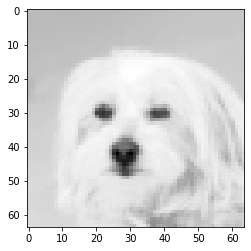

In [29]:
reconstructed_first_r = reconstruct(W_R,r) # 4096 components with one channel(red)
plt.imshow(reconstructed_first_r.reshape(64,64),cmap = "gray")  # An example for one image where k = 4096 in red channel

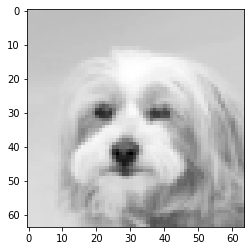

In [30]:
reconstructed_first_g = reconstruct(W_G,g) # 4096 components with one channel(green)
plt.imshow(reconstructed_first_g.reshape(64,64),cmap = "gray") # An example for one image where k = 4096 in green channel

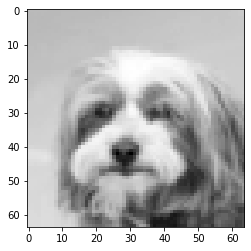

In [31]:
reconstructed_first_b = reconstruct(W_B,b) # 4096 components with one channel(blue)
plt.imshow(reconstructed_first_b.reshape(64,64),cmap = "gray") # An example for one image where k = 4096 in blue channel

In [32]:
# Resizing and stacking three channels into one
reconstructed_first_r.resize(64,64),reconstructed_first_g.resize(64,64),reconstructed_first_b.resize(64,64)
reconst_rgb = stack(reconstructed_first_r,reconstructed_first_g,reconstructed_first_b)
reconst_rgb.shape # size should be 64,64,3

(64, 64, 3)

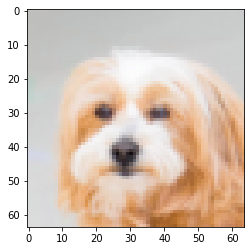

In [33]:
def fit_to_plot(reconst_rgb): # Make it fit to plot function
  reconst_rgb = reconst_rgb.astype('int')
  reconst_rgb = reconst_rgb/np.amax(reconst_rgb)
  return reconst_rgb
reconst_rgb = fit_to_plot(reconst_rgb)
plt.imshow(reconst_rgb) # this is an example for output of k = 4096 principals

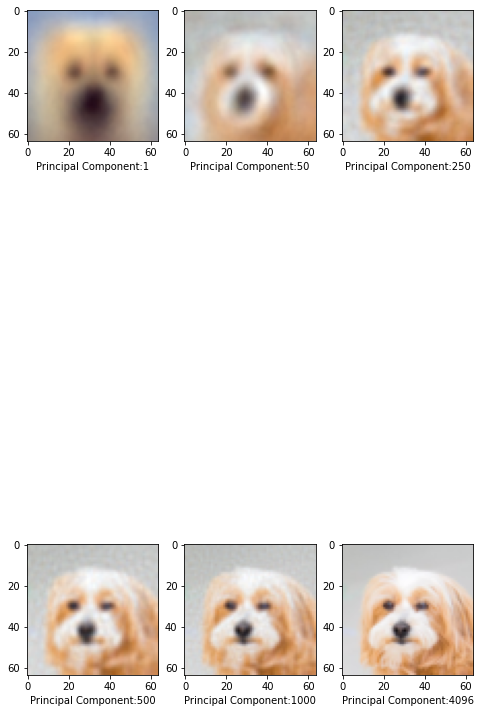

In [34]:
plt.figure(figsize=(8,18))
k_list = [1, 50, 250, 500, 1000, 4096] # All k values
for i in range(6):
    plt.subplot(2,3,i+1)
    index = k_list[i]
    reconstructed_r = reconstruct(W_R[:,:index],r)
    reconstructed_g = reconstruct(W_G[:,:index],g)
    reconstructed_b = reconstruct(W_B[:,:index],b)
    reconstructed_r.resize(64,64), reconstructed_g.resize(64,64), reconstructed_b.resize(64,64)
    stacked = stack(reconstructed_r, reconstructed_g, reconstructed_b)
    stacked = fit_to_plot(stacked)
    plt.imshow(stacked)
    plt.xlabel(f'Principal Component:{index}')